In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft , rfft, irfft , fftfreq
from numpy import exp, log, log10, cos, sin, pi, cosh, sinh , sqrt
from classy import Class
from scipy.optimize import fsolve
from scipy.special import gamma
from scipy.special import hyp2f1
from scipy import interpolate
import sys,os
from time import time
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy import special
from scipy.special import factorial
import math

In [30]:
z_pk = 0
external_file = os.getcwd()+'/Class_z0.dat'

common_settings = {# fixed LambdaCDM parameters
                   'A_s':2.100549e-9,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   'omega_b':0.0223828,
                   'omega_cdm':0.1201075,
                   'h':0.6732117,
                   'YHe':0.2454006,
                   'N_ur':2.0328,
                   'N_ncdm':1,
                   'm_ncdm':0.06,
                   'z_pk':z_pk
                    }  


cosmo = Class()
cosmo.set(common_settings)
cosmo.set({'output':'mPk',
        'non linear':'PT',
        'IR resummation':'No',
        'Bias tracers':'Yes',
        'cb':'Yes',
        'RSD':'No',
        # 'AP':'Yes',
        # 'Omfid':'0.31',
        'PNG': 'No',
        'Input Pk':external_file # load in external spectrum here
       })
cosmo.compute()

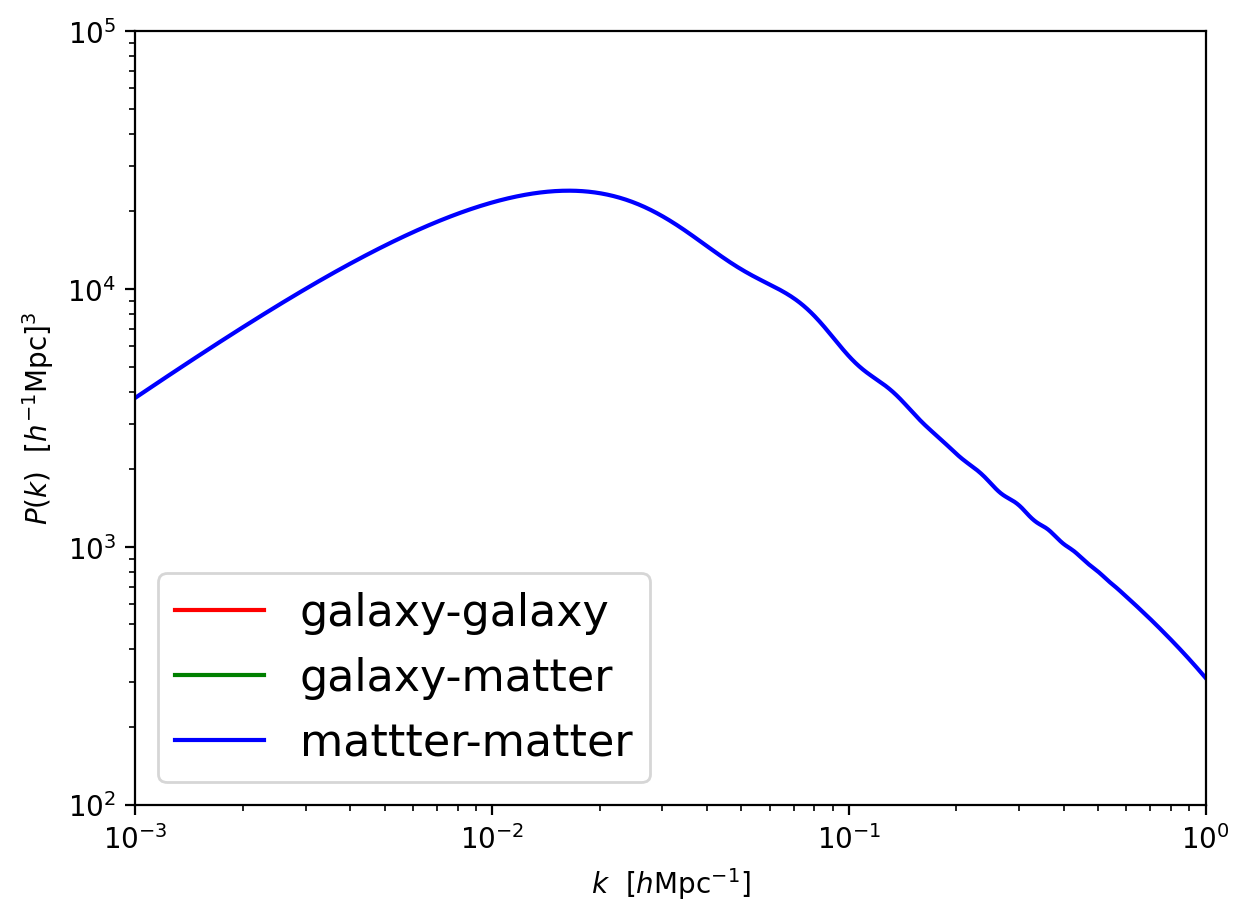

In [31]:
#############################################################################################
#
# extract spectra and plot them using the external Pk rather than the default CLASS one
#
#############################################################################################

##### NUISANCE PARAMETERS ####
b1 = 2.0
cs = 1. # in units [Mpc/h]^2
b2 = -1.
bG2 = 0.1
bGamma3 = -0.1
Pshot = 5e3 # in units [Mpc/h]^3
cs0 = 5. # in units [Mpc/h]^2
cs2 = 15. # in units [Mpc/h]^2
cs4 = -5. # in units [Mpc/h]^2
b4 = 100. # in units [Mpc/h]^4
##############################

h = cosmo.h()
fz = cosmo.scale_independent_growth_factor_f(0)
kvec = np.logspace(-3,np.log10(3),1000) # array of kvec in h/Mpc
twopi = 2.*math.pi
khvec = kvec*h # array of kvec in 1/Mpc
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()

# Initialize output wrapper
cosmo.initialize_output(khvec, z_pk, len(khvec))
pk_gg_ext = cosmo.pk_gg_real(b1, b2, bG2, bGamma3, cs, cs0, Pshot)
pk_gm_ext = cosmo.pk_gm_real(b1, b2, bG2, bGamma3, cs, cs0)
pk_mm_ext = cosmo.pk_mm_real(cs)

ax_Pk.loglog(kvec,np.array(pk_gg_ext),color='r',linestyle='-',label='galaxy-galaxy')
ax_Pk.loglog(kvec,np.array(pk_gm_ext),color='g',linestyle='-',label='galaxy-matter')
ax_Pk.loglog(kvec,np.array(pk_mm_ext),color='b',linestyle='-',label='mattter-matter')
# ax_Pk.loglog(k_vals_invMpc/h,np.asarray(pk_lin)*h**3.,color='purple',linestyle='--',label='input linear pk')

# # output of P(k) figures
ax_Pk.set_xlim([1.e-3,1])
ax_Pk.set_ylim([100,1e5])
ax_Pk.set_xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
ax_Pk.set_ylabel(r'$P(k)\,\,\,\, [h^{-1}\mathrm{Mpc}]^3$')
ax_Pk.legend(fontsize='16',ncol=1,loc='lower left')
fig_Pk.tight_layout()

In [32]:
mults = cosmo.get_pk_mult(khvec, z_pk, len(khvec))
# separate contributions of the matter-matter power spectrum
pk_tree = mults[14]*h**3.
pk_loop = mults[0]*h**3.
pk_ctr = 2*mults[10]*h
# separate contributions of the galaxy-galaxy power spectrum
pk_Id2 = (mults[2])*h**3.
pk_IG2 = (mults[3])*h**3. 
pk_Id2d2 = (mults[1])*h**3. 
pk_IG2G2 = (mults[5])*h**3. 
pk_Id2G2 = (mults[4])*h**3. 
pk_FG2 = (mults[6])*h**3.
# separate contributions of the 1-loop matter power spectra
pk_22 = (mults[-2])*h**3. 
pk_13 = (mults[-1])*h**3.

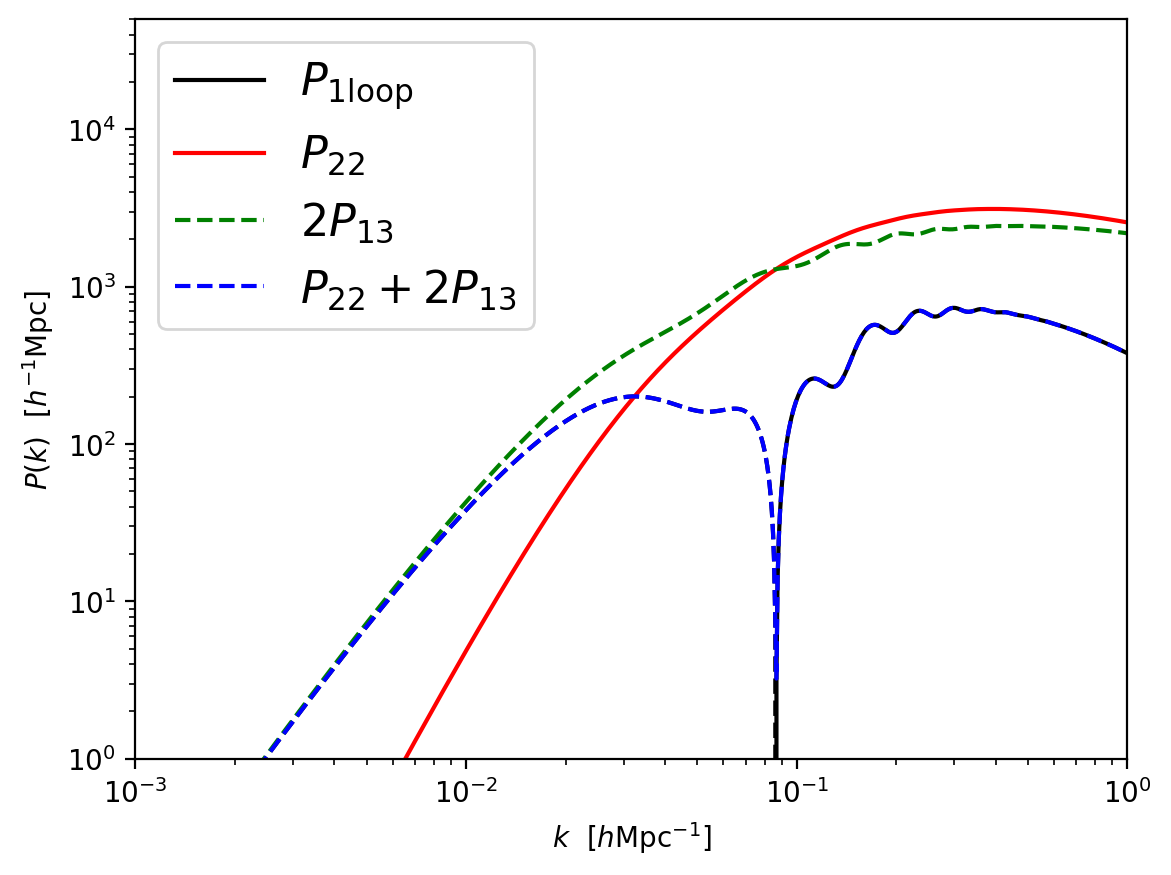

In [33]:

# plt.loglog(kvec,np.array(np.abs(pk_loop)),color='k',linestyle='-',label=r'$P_\mathrm{1loop}$')
plt.loglog(kvec,np.array(pk_loop),color='k',linestyle='-',label=r'$P_\mathrm{1loop}$')
plt.loglog(kvec,np.array(-pk_loop),color='k',linestyle='--')
plt.loglog(kvec,np.array(np.abs(pk_22)),color='r',linestyle='-',label=r'$P_{22}$')
plt.loglog(kvec,np.array(np.abs(pk_13)),color='g',linestyle='--',label=r'$2P_{13}$')
plt.loglog(kvec,np.array(np.abs(pk_13 +pk_22)),color='b',linestyle='--',label=r'$P_{22}+2P_{13}$')
plt.xlim([1.e-3,1])
plt.ylim([1,5e4])
plt.xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)\,\,\,\, [h^{-1}\mathrm{Mpc}]$')
plt.legend(fontsize='16',ncol=1,loc='upper left')

In [34]:
print(np.array([mults[i,0] for i in range(len(mults))]))

[-2.43394276e-01 -4.05605828e+03             nan -1.50711580e+00
 -5.06655948e+00  7.12018589e-02 -1.96536351e+00             nan
             nan             nan -5.62556649e-03             nan
             nan             nan  1.24126050e+04             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
 -1.79666234e-06             nan             nan             nan
             nan             nan             nan             nan
 -6.94307964e+02             nan             nan             nan
             nan         

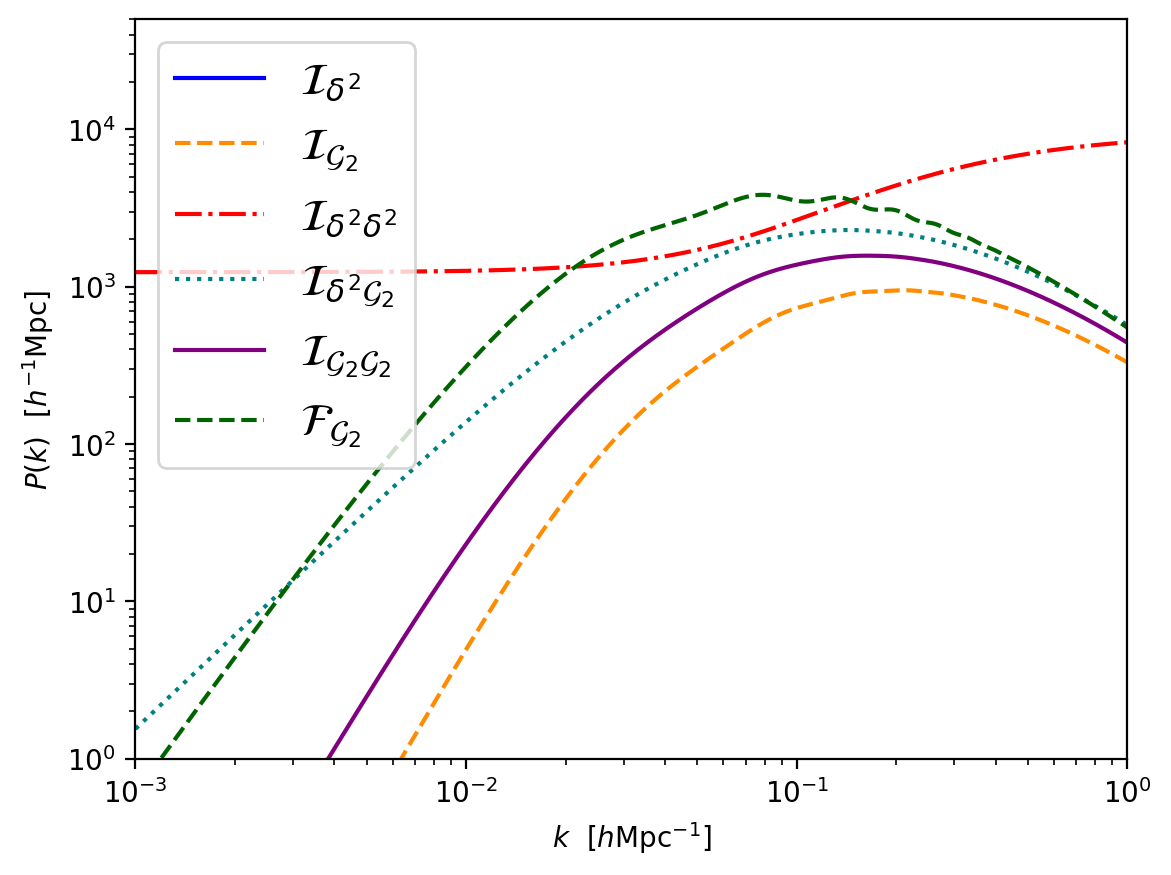

In [35]:
plt.loglog(kvec,np.array(np.abs(pk_Id2)),color='b',linestyle='-',label=r'${\cal I}_{\delta^2}$')
plt.loglog(kvec,np.array(np.abs(pk_IG2)),color='darkorange',linestyle='--',label=r'${\cal I}_{{\cal G}_2}$')
plt.loglog(kvec,np.array(np.abs(pk_Id2d2)),color='r',linestyle='-.',label=r'${\cal I}_{\delta^2\delta^2}$')
plt.loglog(kvec,np.array(np.abs(pk_Id2G2)),color='teal',linestyle=':',label=r'${\cal I}_{\delta^2{\cal G}_2}$')
plt.loglog(kvec,np.array(np.abs(pk_IG2G2)),color='purple',linestyle='-',label=r'${\cal I}_{{\cal G}_2{\cal G}_2}$')
plt.loglog(kvec,np.array(np.abs(pk_FG2)),color='darkgreen',linestyle='--',label=r'${\cal F}_{{\cal G}_2}$')

plt.xlim([1.e-3,1])
plt.ylim([1,5e4])
plt.xlabel(r'$k \,\,\,\, [h\mathrm{Mpc}^{-1}]$')
plt.ylabel(r'$P(k)\,\,\,\, [h^{-1}\mathrm{Mpc}]$')
plt.legend(fontsize='16',ncol=1,loc='upper left')